In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

<AxesSubplot:>

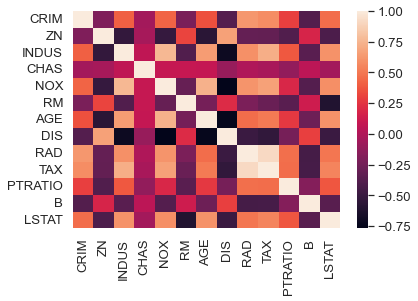

In [56]:
# Loading Dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
sns.heatmap(boston_df.corr())

In [57]:
# Scalling and diving data into traingin and testing dataset
X,y=boston.data,boston.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)
scaller=StandardScaler()
scaller.fit_transform(X_train)
scaller.transform(X_test)

array([[-0.46727737, -0.50172032, -1.2165238 , ..., -0.1895722 ,
         0.04853599, -0.8520596 ],
       [-0.48199032,  3.62901144, -1.44495266, ..., -1.52272223,
         0.41313046, -1.22758854],
       [ 0.2112954 , -0.50172032,  0.99647176, ...,  0.82178299,
         0.33158742,  0.62502089],
       ...,
       [-0.47969433, -0.50172032, -0.99827966, ...,  0.17819332,
         0.33732989, -0.31241061],
       [-0.47611306, -0.50172032, -0.98373005, ...,  0.04028125,
         0.40686595, -0.86874978],
       [-0.46003699, -0.50172032, -0.76985079, ...,  0.36207608,
         0.41866411, -0.36804453]])

The line `theta -= alpha * ((y_pred - y).sum() / m)` in your original code is attempting to update the theta values using the average error for all data points. However, this is not the correct way to perform the parameter updates in the context of multiple linear regression.

In multiple linear regression, you need to update each parameter (feature coefficient and intercept) separately based on the gradients of the cost function with respect to each parameter. The correct way to update theta is using the gradient descent update rule for multiple linear regression, which involves calculating the gradients for each parameter. The correct update step should look like this:


`gradient = (1/m) * X.T.dot(y_pred - y)`

`theta -= alpha * gradient`

In [58]:
class LinearRegression:
    def fit(self, X, y, alpha=0.01, max_iter=20):
        def gradientDescent(X, y, alpha, max_iter):
            m = X.shape[0]
            theta = np.random.randn(X.shape[1]+1)

            # Appending a column in X-matrix for Intercept
            X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

            # Until Converge
            for _ in range(max_iter):
                # Matrix-Multiplication to get y_pred
                y_pred = X.dot(theta)

                # The line theta -= alpha * ((y_pred - y).sum() / m) in your original code is attempting to update the theta values using the average error for all data points.
                # However, this is not the correct way to perform the parameter updates in the context of multiple linear regression.
                # theta -= alpha*((y_pred-y).sum()/m)

                # In multiple linear regression, you need to update each parameter(feature coefficient and intercept) separately based on the gradients of the cost function with respect to each parameter
                gradient = (1/m) * X.T.dot(y_pred - y)
                theta -= alpha * gradient
            return theta
        self.theta=gradientDescent(X,y,alpha,max_iter)

    def predict(self,X):
        try:
            m=X.shape[0]
            X = np.append(X, np.ones((m, 1)), axis=1)
            y_pred=X.dot(self.theta)
            return y_pred
        except:
            raise Exception("Fit the model properly !")


In [59]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([-2.73001451e+72, -2.76371420e+72, -4.73638447e+72, -3.20470713e+72,
       -2.98013835e+72, -2.66034475e+72, -3.07861716e+72, -4.76802054e+72,
       -4.78515116e+72, -2.73164355e+72, -3.67852203e+72, -3.50279079e+72,
       -4.24307392e+72, -3.03736364e+72, -3.00883080e+72, -2.88254742e+72,
       -4.64279525e+72, -2.45966853e+72, -2.98888653e+72, -2.72638892e+72,
       -2.98480474e+72, -3.02548726e+72, -3.12036976e+72, -2.89987730e+72,
       -2.42299500e+72, -2.57171550e+72, -3.61134534e+72, -2.97810935e+72,
       -3.65209239e+72, -3.04506231e+72, -3.62319444e+72, -2.61573491e+72,
       -2.98383476e+72, -2.92048769e+72, -3.40646503e+72, -2.60029414e+72,
       -3.17782428e+72, -3.64970391e+72, -4.75931258e+72, -2.97013380e+72,
       -2.60327718e+72, -3.27988841e+72, -3.41692214e+72, -2.82243692e+72,
       -4.36247128e+72, -2.89418833e+72, -2.60903164e+72, -3.15469870e+72,
       -3.41799589e+72, -2.90912593e+72, -4.78829044e+72, -2.84946367e+72,
       -2.84368340e+72, -

Text(0.5, 1.0, 'Predicted-Values')

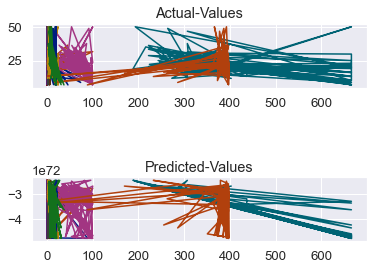

In [60]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")


`SK-Learns Model Prediction`

In [61]:
from sklearn.linear_model import LinearRegression as Lin_Reg
sk_model=Lin_Reg()
sk_model.fit(X_train,y_train)
sk_pred=sk_model.predict(X_test)

Text(0.5, 1.0, 'Sk-learns Predicted-Values')

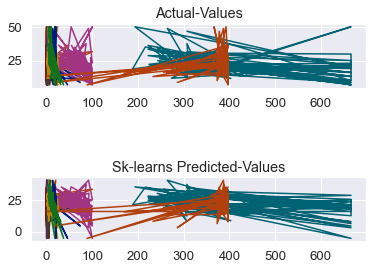

In [62]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, sk_pred)
plt.title("Sk-learns Predicted-Values")


In [63]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)
print("sk-learns Mean Squared Error: ", sk_mse)
print("sk-learns R-squared: ", sk_r2)

My Mean Squared Error:  1.1596082269234337e+145
My R-squared:  -1.6099094250654763e+143
sk-learns Mean Squared Error:  23.428385859182555
sk-learns R-squared:  0.6747386028052117
